Here I impelemented the generalized gradient bandit algorithm when Ψ(x) = ReLU(x) and update rule was changed to $H_{t+1}(a) = H_t(a) + α (R_t - \bar{R}_t)\frac{Ψ'(H_t(a))}{Ψ(H_t(a))}([A_t = a] - π_t(a))$


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def psi(x):
    return np.maximum(0, x)

def psi_prime(x):
    return (x >= 0).astype(float)

def gradient_bandit(T, alpha, baseline=0):
    H = np.zeros(10)
    Opt = np.zeros(T)
    R = np.zeros(T)
    R_avg = 0

    for n in range(T):
        psi_H = psi(H)
        if np.all(psi_H == 0):
            p = np.ones(10) / 10
        else:
            p = psi_H / np.sum(psi_H)

        bandit_c = np.random.choice(10, p=p)

        reward = np.random.normal((bandit_c + 1) / 10., 1) + baseline
        R_avg += (reward - R_avg) / (n + 1)

        psi_p = psi_prime(H)
        psi_s = np.where(psi_H > 0, psi_H, 1)
        u = np.zeros(10)
        u[bandit_c] = 1
        H += alpha * (reward - R_avg) * (psi_p / psi_s) * (u - p)

        if bandit_c == 9:
            Opt[n] = 1
        R[n] = reward

    return Opt, R

Plot the graphs for some simulation, that took approximately 4 minutes. Alphas values are 0.1, 0.4, 0.7.

Also, optimal actions and rewards over time are approximately the same even though they are too noisy. This is because distributions are close.


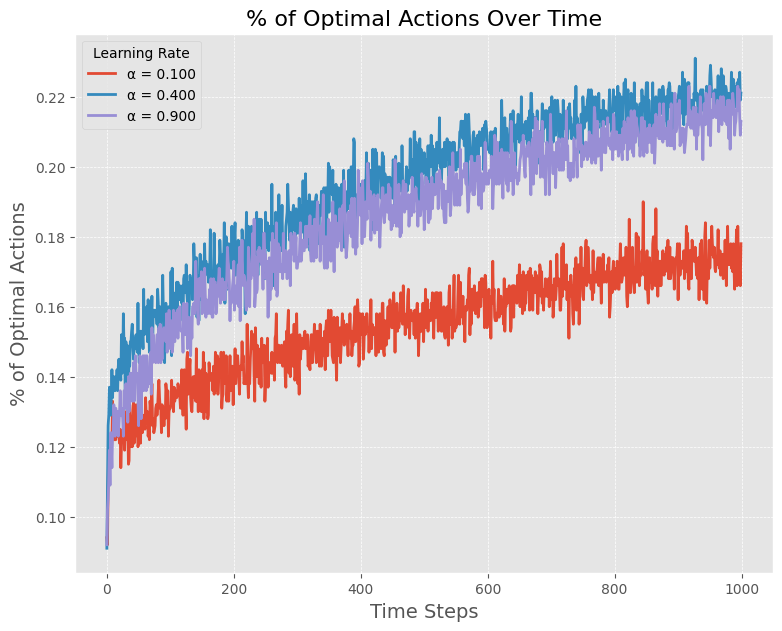

In [ ]:
T = 1000
N = 1000
alpha = np.array([0.1, 0.4, 0.9])
results_Opt = np.zeros((len(alpha), T))
results_R = np.zeros((len(alpha), T))


for idx, a in enumerate(alpha):
    for _ in range(N):
        run_Opt, run_R = gradient_bandit(T, a)
        results_Opt[idx] += run_Opt
        results_R[idx] += run_R

results_Opt /= N
results_R /= N

plt.style.use('ggplot')
fig, ax = plt.subplots(figsize=(9, 7))
for i, a in enumerate(alpha):
    ax.plot(results_Opt[i], label=f'α = {a:.3f}', linewidth=2)
ax.set_title('% of Optimal Actions Over Time', fontsize=16)
ax.set_xlabel('Time Steps', fontsize=14)
ax.set_ylabel('% of Optimal Actions', fontsize=14)
ax.legend(title='Learning Rate')
ax.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()

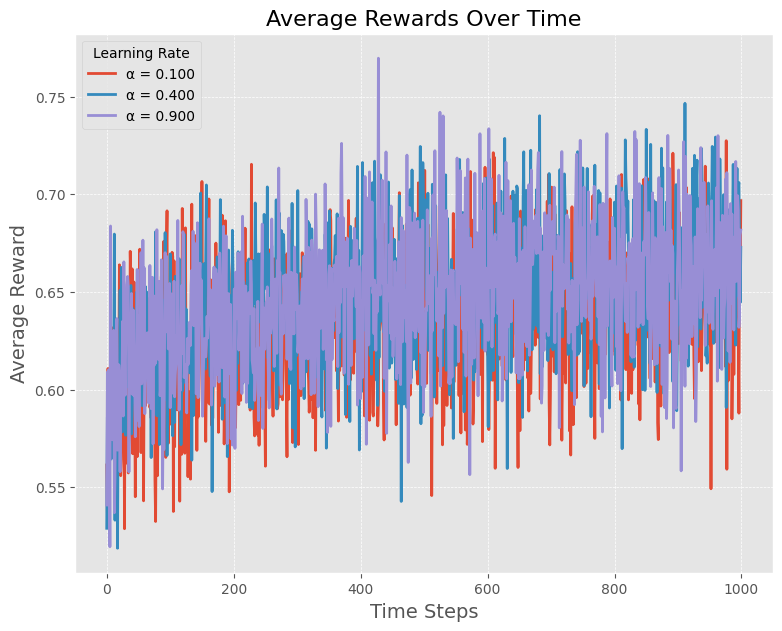

In [ ]:
fig2, ax2 = plt.subplots(figsize=(9, 7))
for i, a in enumerate(alpha):
    ax2.plot(results_R[i], label=f'α = {a:.3f}', linewidth=2)
ax2.set_title('Average Rewards Over Time', fontsize=16)
ax2.set_xlabel('Time Steps', fontsize=14)
ax2.set_ylabel('Average Reward', fontsize=14)
ax2.legend(title='Learning Rate')
ax2.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()

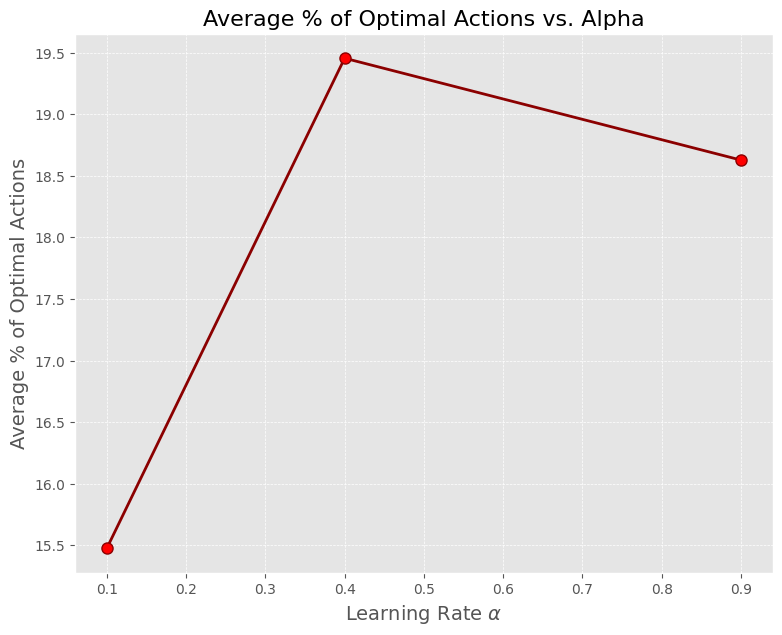

In [ ]:
final_opt = np.average(results_Opt, axis=1)  # Using 'results_Opt' if following the code pattern above

# Plotting with updated style and aesthetic adjustments
plt.style.use('ggplot')  # Consistent with previous style for continuity
fig3, ax3 = plt.subplots(figsize=(9, 7))
ax3.plot(alpha, final_opt * 100, 'o-', color='darkred', markerfacecolor='red', markersize=8, linewidth=2)
ax3.set_title('Average % of Optimal Actions vs. Alpha', fontsize=16)
ax3.set_xlabel(r'Learning Rate $\alpha$', fontsize=14)
ax3.set_ylabel('Average % of Optimal Actions', fontsize=14)
ax3.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()

Here it is implemented for Ψ(x) = ReLU(x)^2.


In [ ]:
def psi(x):
    return np.maximum(0, x) ** 2

def psi_prime(x):
    return 2 * np.maximum(0, x)

The same simulation


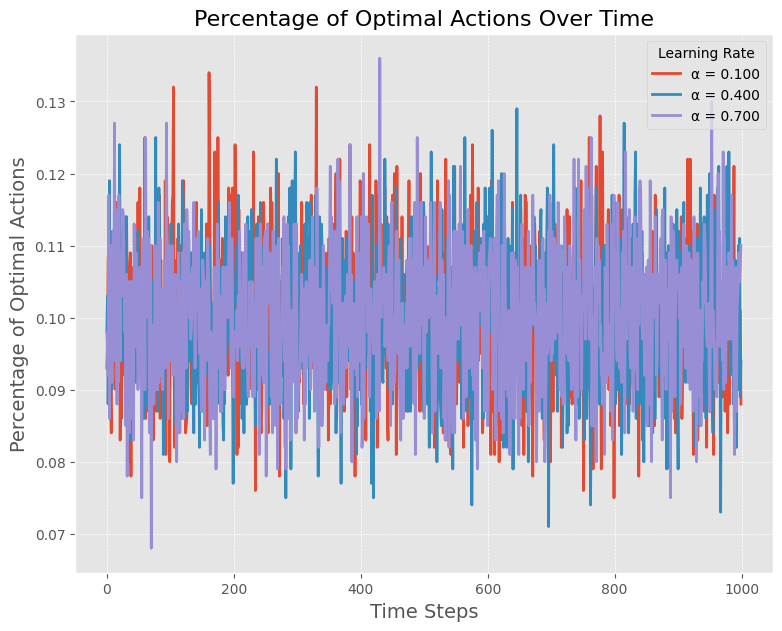

In [ ]:
T = 1000
N_runs = 1000
alpha = np.array([0.1, 0.4, 0.7])
results_Opt = np.zeros((len(alpha), T))
results_R = np.zeros((len(alpha), T))

for idx, a in enumerate(alpha):
    for _ in range(N_runs):
        run_Opt, run_R = gradient_bandit(T, a)
        results_Opt[idx] += run_Opt
        results_R[idx] += run_R

results_Opt /= N_runs
results_R /= N_runs

plt.style.use('ggplot')
fig, ax = plt.subplots(figsize=(9, 7))
for i, a in enumerate(alpha):
    ax.plot(results_Opt[i], label=f'α = {a:.3f}', linewidth=2)
ax.set_title('Percentage of Optimal Actions Over Time', fontsize=16)
ax.set_xlabel('Time Steps', fontsize=14)
ax.set_ylabel('Percentage of Optimal Actions', fontsize=14)
ax.legend(title='Learning Rate')
ax.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()

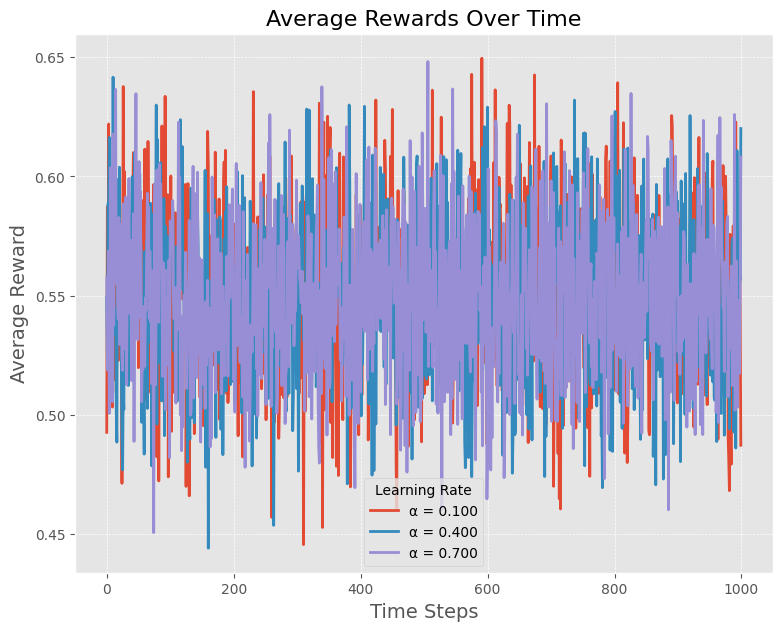

In [ ]:
fig2, ax2 = plt.subplots(figsize=(9, 7))
for i, a in enumerate(alpha):
    ax2.plot(results_R[i], label=f'α = {a:.3f}', linewidth=2)
ax2.set_title('Average Rewards Over Time', fontsize=16)
ax2.set_xlabel('Time Steps', fontsize=14)
ax2.set_ylabel('Average Reward', fontsize=14)
ax2.legend(title='Learning Rate')
ax2.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()


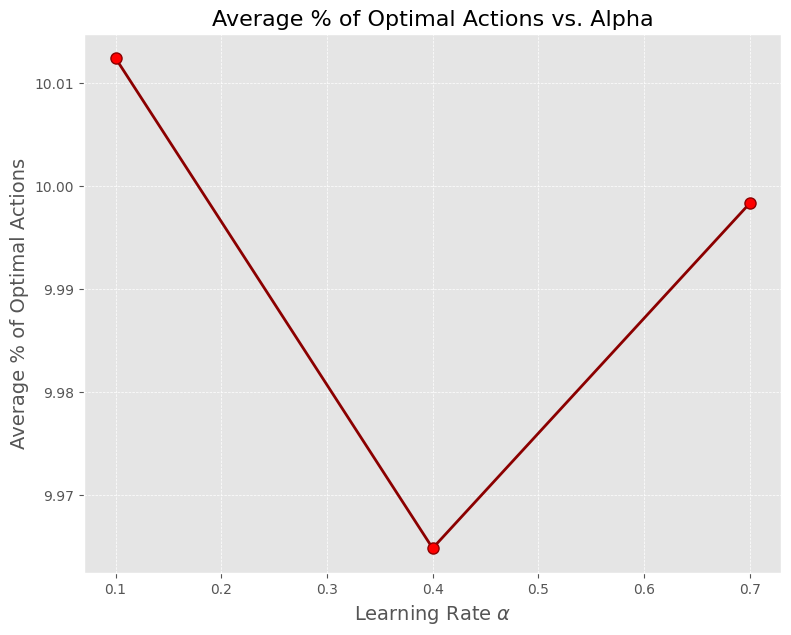

In [ ]:
final_opt = np.average(results_Opt, axis=1)

plt.style.use('ggplot')
fig3, ax3 = plt.subplots(figsize=(9, 7))
ax3.plot(alpha, final_opt * 100, 'o-', color='darkred', markerfacecolor='red', markersize=8, linewidth=2)
ax3.set_title('Average % of Optimal Actions vs. Alpha', fontsize=16)
ax3.set_xlabel(r'Learning Rate $\alpha$', fontsize=14)
ax3.set_ylabel('Average % of Optimal Actions', fontsize=14)
ax3.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()

Here Ψ(x) = ReLU(x)^3.


In [ ]:
def psi(x):
    """Cube of ReLU activation function."""
    return np.maximum(0, x) ** 3

def psi_prime(x):
    """Derivative of the cube of ReLU activation function."""
    return 3 * np.maximum(0, x) ** 2

The same simulations


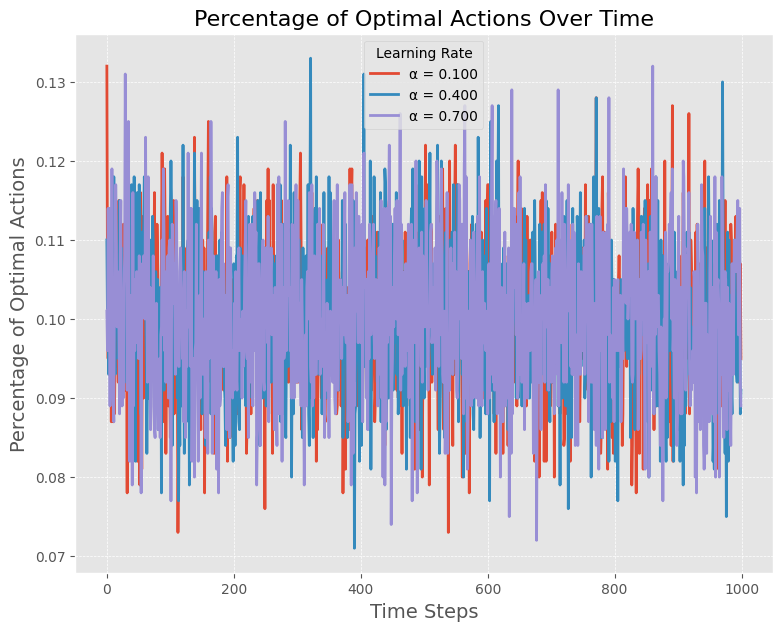

In [ ]:
T = 1000
N_runs = 1000
alpha = np.array([0.1, 0.4, 0.7])
results_Opt = np.zeros((len(alpha), T))
results_R = np.zeros((len(alpha), T))

for idx, a in enumerate(alpha):
    for _ in range(N_runs):
        run_Opt, run_R = gradient_bandit(T, a)
        results_Opt[idx] += run_Opt
        results_R[idx] += run_R

results_Opt /= N_runs
results_R /= N_runs

plt.style.use('ggplot')
fig, ax = plt.subplots(figsize=(9, 7))
for i, a in enumerate(alpha):
    ax.plot(results_Opt[i], label=f'α = {a:.3f}', linewidth=2)
ax.set_title('Percentage of Optimal Actions Over Time', fontsize=16)
ax.set_xlabel('Time Steps', fontsize=14)
ax.set_ylabel('Percentage of Optimal Actions', fontsize=14)
ax.legend(title='Learning Rate')
ax.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()


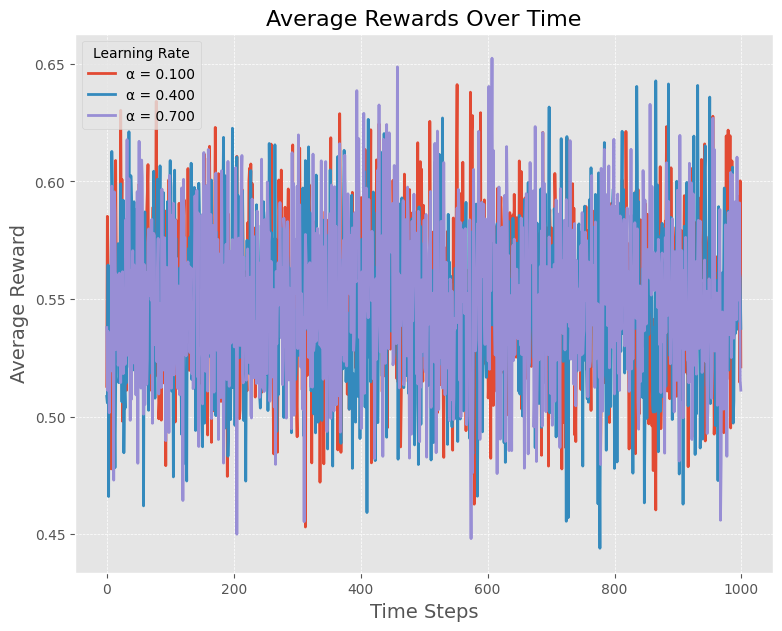

In [ ]:
fig2, ax2 = plt.subplots(figsize=(9, 7))
for i, a in enumerate(alpha):
    ax2.plot(results_R[i], label=f'α = {a:.3f}', linewidth=2)
ax2.set_title('Average Rewards Over Time', fontsize=16)
ax2.set_xlabel('Time Steps', fontsize=14)
ax2.set_ylabel('Average Reward', fontsize=14)
ax2.legend(title='Learning Rate')
ax2.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()


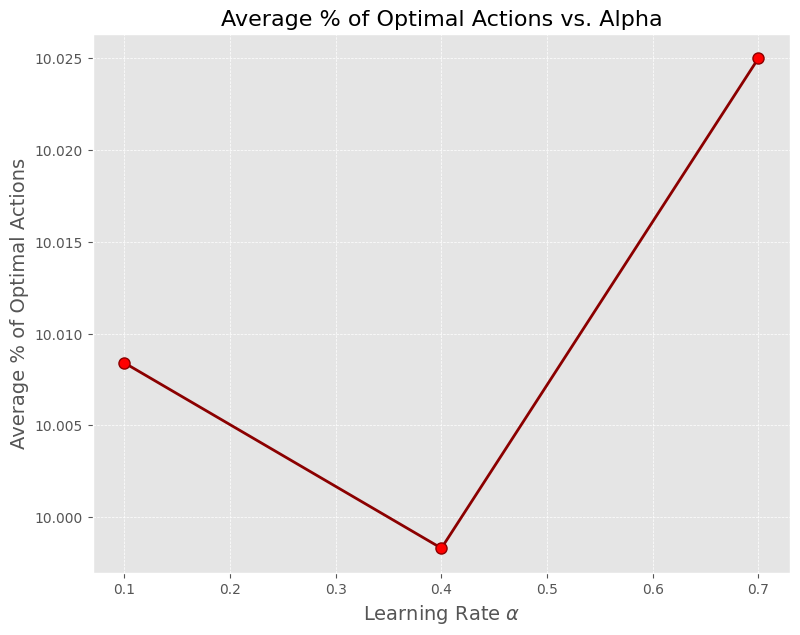

In [ ]:
final_opt = np.average(results_Opt, axis=1)
plt.style.use('ggplot')
fig3, ax3 = plt.subplots(figsize=(9, 7))
ax3.plot(alpha, final_opt * 100, 'o-', color='darkred', markerfacecolor='red', markersize=8, linewidth=2)
ax3.set_title('Average % of Optimal Actions vs. Alpha', fontsize=16)
ax3.set_xlabel(r'Learning Rate $\alpha$', fontsize=14)
ax3.set_ylabel('Average % of Optimal Actions', fontsize=14)
ax3.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()